<a href="https://colab.research.google.com/github/MuskanSultanak/muskan_sultana_k_INBT02581_Aug_2023/blob/main/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR 10 DATASET**

# **IMPORTING LIBRARIES**

In [ ]:
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

# **RESHAPE**

In [ ]:
#Reshape
Y_test_train=Y_train.reshape(-1, )
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
Y_classes=["airplane","automoblie","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
len(Y_classes)

10

# **OBSERVING THE DATASET**

In [ ]:
#observe dataset
def showImage(X,Y,Index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[Index])
  plt.xlabel(Y_classes[Y[Index]])

# **NORMALIZATION**

In [ ]:
#normalize
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# **BUILD MODEL**

In [ ]:
#build model
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=34,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

# **COMPILE MODEL**

In [ ]:
#compile model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# **TRAIN THE MODEL**

In [ ]:
#train model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5)

Epoch 1/5
1563/1563 [==============================] - 111s 70ms/step - loss: 1.4782 - accuracy: 0.4707 - val_loss: 1.2555 - val_accuracy: 0.5589
Epoch 2/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.1045 - accuracy: 0.6139 - val_loss: 1.1430 - val_accuracy: 0.6078
Epoch 3/5
1563/1563 [==============================] - 110s 70ms/step - loss: 0.9804 - accuracy: 0.6579 - val_loss: 1.0009 - val_accuracy: 0.6539
Epoch 4/5
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9076 - accuracy: 0.6854 - val_loss: 0.9690 - val_accuracy: 0.6646
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8491 - accuracy: 0.7053 - val_loss: 0.9134 - val_accuracy: 0.6812


# **MAKE PREDICITIONS**

In [ ]:
#make predicitions
Y_predictions=model.predict(X_test)

313/313 [==============================] - 5s 14ms/step


In [ ]:
Y_predictions[9]

array([4.4898363e-03, 9.1883564e-01, 6.1747211e-04, 3.3853963e-04,
       2.1154177e-04, 1.0588731e-04, 8.6062175e-04, 7.9288540e-05,
       4.4396110e-03, 7.0021421e-02], dtype=float32)

In [ ]:
Y_predictions=[np.argmax(arr) for arr in Y_predictions]

In [ ]:
Y_predictions

[3,
 8,
 8,
 0,
 4,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 3,
 8,
 6,
 7,
 2,
 2,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 4,
 4,
 3,
 9,
 3,
 7,
 1,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 6,
 3,
 8,
 8,
 7,
 8,
 3,
 2,
 7,
 5,
 6,
 9,
 6,
 6,
 1,
 0,
 5,
 7,
 2,
 3,
 8,
 8,
 9,
 2,
 7,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 8,
 9,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 6,
 1,
 1,
 8,
 6,
 8,
 5,
 4,
 0,
 2,
 2,
 9,
 7,
 0,
 4,
 6,
 5,
 8,
 7,
 1,
 2,
 8,
 9,
 8,
 5,
 3,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 3,
 5,
 6,
 5,
 8,
 7,
 6,
 5,
 5,
 5,
 1,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 3,
 1,
 5,
 6,
 0,
 7,
 8,
 6,
 9,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 8,
 7,
 5,
 9,
 0,
 5,
 6,
 2,
 6,
 8,
 6,
 3,
 3,
 8,
 5,
 8,
 7,
 1,
 7,
 3,
 8,
 8,
 7,
 8,
 3,
 9,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 5,
 1,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 4,
 7,
 4,
 9,
 5,
 3,
 9,
 9,
 2,
 3,
 2,
 3,
 1,
 3,
 8,
 8,
 0,
 4,
 7,
 3,
 5,
 1,
 1,
 8,
 9,
 0,
 6,
 1,
 8,
 2,
 0,


In [ ]:
Y_test=Y_test.reshape(-1, )

In [ ]:
Y_predictions[6]

1

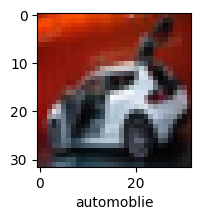

In [ ]:
showImage(X_test,Y_test,6)

# **EVALUATION MODEL**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

NameError: ignored

In [ ]:
print(classification_report(Y_test,Y_predictions))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69      1000
           1       0.81      0.81      0.81      1000
           2       0.60      0.58      0.59      1000
           3       0.50      0.49      0.49      1000
           4       0.63      0.57      0.60      1000
           5       0.60      0.58      0.59      1000
           6       0.78      0.71      0.75      1000
           7       0.68      0.80      0.73      1000
           8       0.70      0.85      0.77      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [ ]:
!pip install confusion_matrix
import confusion_matrix
from sklearn.metrics import confusion_matrix

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.8 MB/s eta 0:00:00
  Created wheel for confusion_matrix: filename=confusion_matrix-0.1-py3-none-any.whl size=2399 sha256=756403b9fef2d36fe7ad608bf4a2ab531f941fd8a085b2e96a696a66b7b57dba
  Stored in directory: /root/.cache/pip/wheels/2a/86/a7/df011be982e86cf5084b4e47b183f46b0773f928abb5c12adb
Successfully built confusion_matrix
None


In [ ]:
cm=confusion_matrix(Y_test,Y_predictions)

In [ ]:
cm

array([[612,  27,  56,  23,  17,   8,   5,  20, 158,  74],
       [ 12, 812,   5,  13,   2,   3,   9,   2,  39, 103],
       [ 47,   8, 579,  61,  85,  72,  54,  56,  24,  14],
       [ 14,  15,  72, 487,  74, 172,  52,  58,  30,  26],
       [ 15,   6,  95,  64, 568,  35,  52, 135,  23,   7],
       [  8,   3,  68, 172,  44, 579,  16,  77,  20,  13],
       [  5,  12,  44,  97,  56,  29, 715,  15,  14,  13],
       [ 10,   2,  27,  32,  51,  54,   4, 800,   7,  13],
       [ 33,  35,  13,  16,   4,   7,   2,   5, 847,  38],
       [ 10,  83,   6,  16,   5,   5,   6,  14,  42, 813]])

In [ ]:
import seaborn as sns

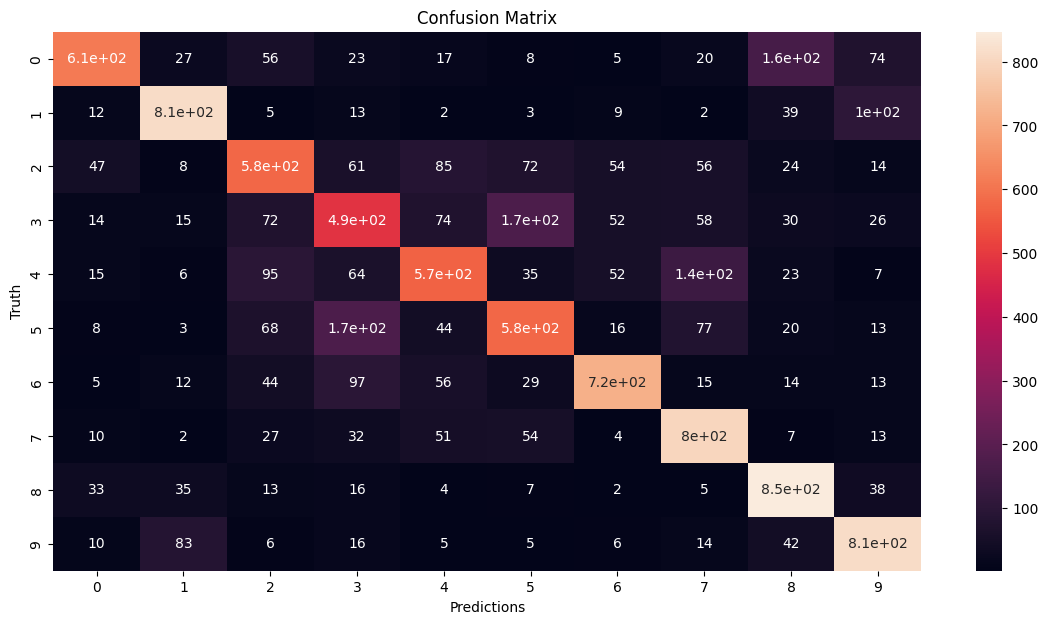

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(cm,annot=(True))
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from keras.datasets import cifar10
from keras.applications import VGG19
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Create a VGG19 model
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
model1= Sequential()
model1.add(base_model)
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model1.fit(X_train, y_train, batch_size=64, epochs=5
           , validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 6782s 10s/step - loss: 1.9107 - accuracy: 0.2158 - val_loss: 1.7768 - val_accuracy: 0.2814
Epoch 2/5
301/704 [===========>..................] - ETA: 1:03:13 - loss: 1.6413 - accuracy: 0.3290